In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets


In [2]:
class LinearRegression():
    def __init__(self, n_feature, batch_size, loss_type = "mse"):
        self.batch_size = batch_size
        self.theta = torch.rand((n_feature))
        self.loss_type = loss_type
    
    def getBatchData(self, X, y, number_batch_size, last_size, ith_batch):
        if ith_batch == number_batch_size - 1 and last_size != 0:
            X_batch = X[ith_batch * self.batch_size : (ith_batch * self.batch_size) + last_size]
            y_batch = y[ith_batch * self.batch_size : (ith_batch * self.batch_size) + last_size]
        else:
            X_batch = X[ith_batch * self.batch_size : (ith_batch + 1) * self.batch_size]
            y_batch = y[ith_batch * self.batch_size : (ith_batch + 1) * self.batch_size]

        return X_batch, y_batch
    
    def predict(self, X):
        y_hat = torch.matmul(X, self.theta)
        return y_hat

    def loss(self, y, y_hat):
        if self.loss_type == "mse":
            loss = torch.sum((y_hat - y) ** 2) / len(y)
        elif self.loss_type == "mae":
            loss =torch.sum(torch.abs(y_hat - y)) / len(y)
        return loss
    
    def gradient(self, X, y, y_hat):
        if self.loss_type == "mse":
            gradient = torch.matmul(X.T, (y_hat - y)) / len(X)
        elif self.loss_type == "mae":
            gradient = torch.matmul(X.T, (y_hat - y) / torch.abs(y_hat - y)) / len(X)
        return gradient

    def fit(self, X_train, y_train, X_val, y_val, n_iters, learning_rate):
        history = {"losses_train": [], "losses_val": []}
        last_size = 0

        if len(X_train) % self.batch_size == 0:
            number_batch_size = int(len(X_train) / self.batch_size)
        else:
            number_batch_size = int(len(X_train) / self.batch_size) + 1
            last_size = len(X_train) - self.batch_size * (int(len(X_train) / self.batch_size))

        for epoch in range(n_iters):
            for ith_batch in range(0, number_batch_size):
                # get X_batch, y_batch
                X_train_batch, y_train_batch = self.getBatchData(X_train, y_train, number_batch_size, last_size, ith_batch)
                # predict
                y_train_batch_hat = self.predict(X_train_batch)

                # compute loss
                loss = self.loss(y_train_batch, y_train_batch_hat)

                # calculate the gradient
                gradient = self.gradient(X_train_batch, y_train_batch, y_train_batch_hat)
                
                # update theta
                self.theta -= learning_rate * gradient

                # for debug
                # calculate loss and accuracy of train sets
                history['losses_train'].append(loss)

                y_train_hat = self.predict(X_train)

                # calculate loss and accuracy of validation sets
                y_val_hat = self.predict(X_val)
                loss_val = self.loss(y_val, y_val_hat)
                history['losses_val'].append(loss_val)


            if (epoch + 1) % 10 == 0:
                print("Epoch: {}, loss: {}, loss_val: {}".format(epoch + 1, loss, loss_val))
        return history

# Boston Housing Price Dataset 

In [44]:
boston_housing_data = datasets.load_boston()
bostone_housing_df = pd.DataFrame(boston_housing_data.data, columns = boston_housing_data.feature_names)
bostone_housing_df['target'] = boston_housing_data.target
bostone_housing_df


c:\Users\Tran Nguyen Nhut Duy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Preprocessing Data

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

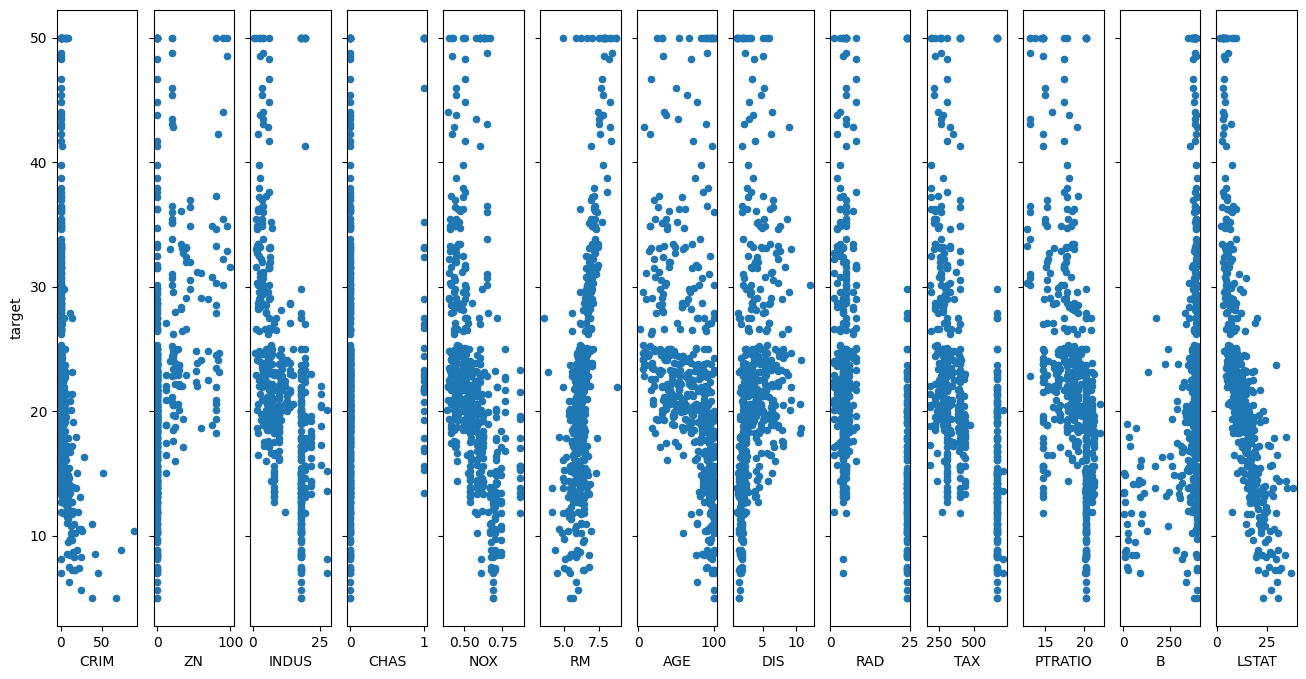

In [83]:
# plot the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 13, sharey=True)
bostone_housing_df.plot(kind='scatter', x='CRIM', y='target', ax=axs[0], figsize=(16, 8))
bostone_housing_df.plot(kind='scatter', x='ZN', y='target', ax=axs[1])
bostone_housing_df.plot(kind='scatter', x='INDUS', y='target', ax=axs[2])
bostone_housing_df.plot(kind='scatter', x='CHAS', y='target', ax=axs[3])
bostone_housing_df.plot(kind='scatter', x='NOX', y='target', ax=axs[4])
bostone_housing_df.plot(kind='scatter', x='RM', y='target', ax=axs[5])
bostone_housing_df.plot(kind='scatter', x='AGE', y='target', ax=axs[6])
bostone_housing_df.plot(kind='scatter', x='DIS', y='target', ax=axs[7])
bostone_housing_df.plot(kind='scatter', x='RAD', y='target', ax=axs[8])
bostone_housing_df.plot(kind='scatter', x='TAX', y='target', ax=axs[9])
bostone_housing_df.plot(kind='scatter', x='PTRATIO', y='target', ax=axs[10])
bostone_housing_df.plot(kind='scatter', x='B', y='target', ax=axs[11])
bostone_housing_df.plot(kind='scatter', x='LSTAT', y='target', ax=axs[12])


In [ ]:
# se

In [67]:
# convert to tensor, select LSTAT and RM as features
X = torch.tensor(bostone_housing_df[['LSTAT', 'RM']].values, dtype=torch.float32)
y = torch.tensor(bostone_housing_df['target'].values, dtype=torch.float32)

print(X.shape)
print(y.shape)

torch.Size([506, 2])
torch.Size([506])


In [68]:
#  normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)


In [69]:
# add bias
X = torch.cat([torch.ones(len(X), 1), X], dim = 1)

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
#TEST_SIZE = 0.1
TRAIN_SAMPLES = int(TRAIN_SIZE * bostone_housing_tensor.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * bostone_housing_tensor.shape[0])

X_train, y_train = X[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X[VAL_SAMPLES:], y[VAL_SAMPLES:]

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


torch.Size([354, 3]) torch.Size([101, 3]) torch.Size([51, 3])
torch.Size([354]) torch.Size([101]) torch.Size([51])


In [70]:
print(X_train.mean(dim = 0))

tensor([ 1.0000, -0.3197,  0.1697])


## Training

In [71]:
n_features = X_train.shape[1]

### Batch_size = 1, learning_rate = 1e-4, MAE

In [85]:
batch_size = 1
learning_rate = 1e-4
n_iters = 500
LinearRegressionModel = LinearRegression(n_features, batch_size = batch_size, loss_type = "mae")
history = LinearRegressionModel.fit(X_train, y_train, X_val, y_val, n_iters, learning_rate)


Epoch: 10, loss: 29.557952880859375, loss_val: 14.979692459106445
Epoch: 20, loss: 29.03676414489746, loss_val: 14.761661529541016
Epoch: 30, loss: 28.515573501586914, loss_val: 14.543628692626953
Epoch: 40, loss: 27.994382858276367, loss_val: 14.325596809387207
Epoch: 50, loss: 27.473194122314453, loss_val: 14.107565879821777
Epoch: 60, loss: 26.95242691040039, loss_val: 13.889952659606934
Epoch: 70, loss: 26.43166160583496, loss_val: 13.672340393066406
Epoch: 80, loss: 25.910898208618164, loss_val: 13.454727172851562
Epoch: 90, loss: 25.390134811401367, loss_val: 13.237113952636719
Epoch: 100, loss: 24.86937141418457, loss_val: 13.019499778747559
Epoch: 110, loss: 24.34832000732422, loss_val: 12.80159854888916
Epoch: 120, loss: 23.826717376708984, loss_val: 12.583137512207031
Epoch: 130, loss: 23.30511474609375, loss_val: 12.364673614501953
Epoch: 140, loss: 22.783512115478516, loss_val: 12.14621353149414
Epoch: 150, loss: 22.261903762817383, loss_val: 11.927756309509277
Epoch: 160, 

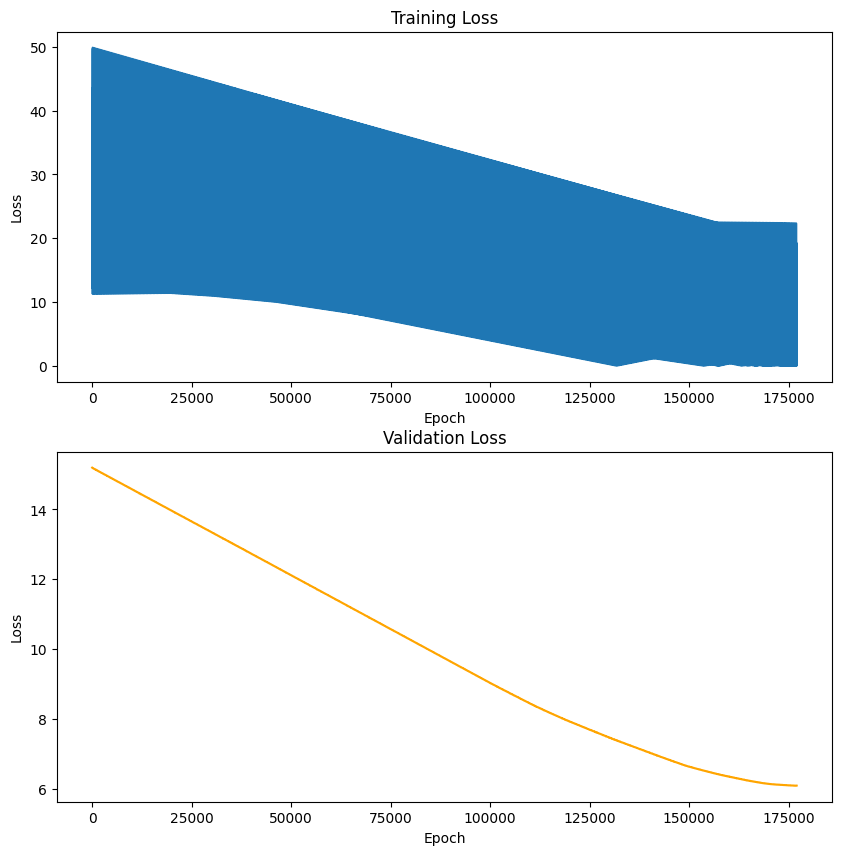

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(history["losses_train"])
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax[1].plot(history['losses_val'], 'orange')
ax[1].set(xlabel='Epoch', ylabel='Loss')
ax[1].set_title('Validation Loss')

plt.show()

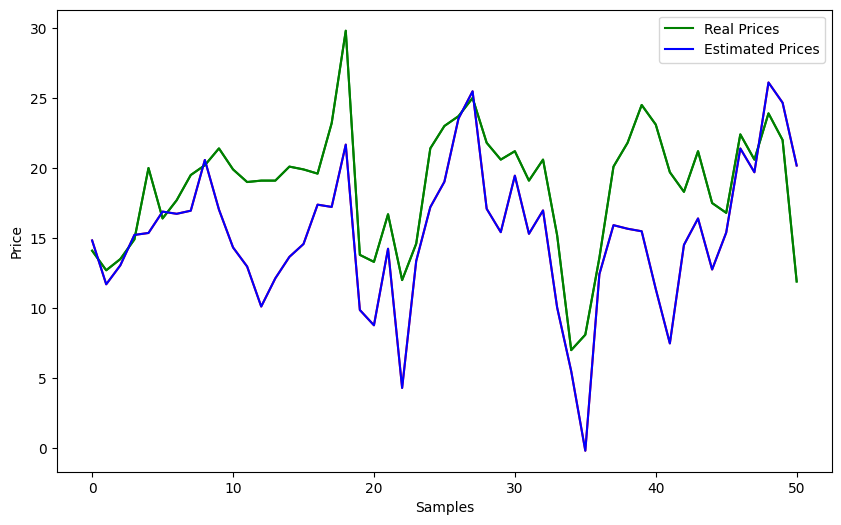

In [87]:
estimated_prices = []

for feature in X_test: 
    estimated_price = sum(c*x for x, c in zip(feature, LinearRegressionModel.theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y_test, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(y_test, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()

### Batch_size = 32, learning_rate = 1e-3, MAE

In [98]:
batch_size = 32
n_iters = 1800
learning_rate = 1e-3
LinearRegressionModel = LinearRegression(n_features, batch_size = batch_size, loss_type = "mae")
history = LinearRegressionModel.fit(X_train, y_train, X_val, y_val, n_iters, learning_rate)

Epoch: 10, loss: 24.374231338500977, loss_val: 15.474630355834961
Epoch: 20, loss: 24.21363067626953, loss_val: 15.405481338500977
Epoch: 30, loss: 24.053028106689453, loss_val: 15.336336135864258
Epoch: 40, loss: 23.892427444458008, loss_val: 15.267189979553223
Epoch: 50, loss: 23.731826782226562, loss_val: 15.198043823242188
Epoch: 60, loss: 23.571224212646484, loss_val: 15.128897666931152
Epoch: 70, loss: 23.41062355041504, loss_val: 15.059751510620117
Epoch: 80, loss: 23.250019073486328, loss_val: 14.990599632263184
Epoch: 90, loss: 23.08940887451172, loss_val: 14.921445846557617
Epoch: 100, loss: 22.928802490234375, loss_val: 14.852294921875
Epoch: 110, loss: 22.768192291259766, loss_val: 14.783140182495117
Epoch: 120, loss: 22.607585906982422, loss_val: 14.713988304138184
Epoch: 130, loss: 22.446975708007812, loss_val: 14.644834518432617
Epoch: 140, loss: 22.286367416381836, loss_val: 14.57568073272705
Epoch: 150, loss: 22.12575912475586, loss_val: 14.5065279006958
Epoch: 160, lo

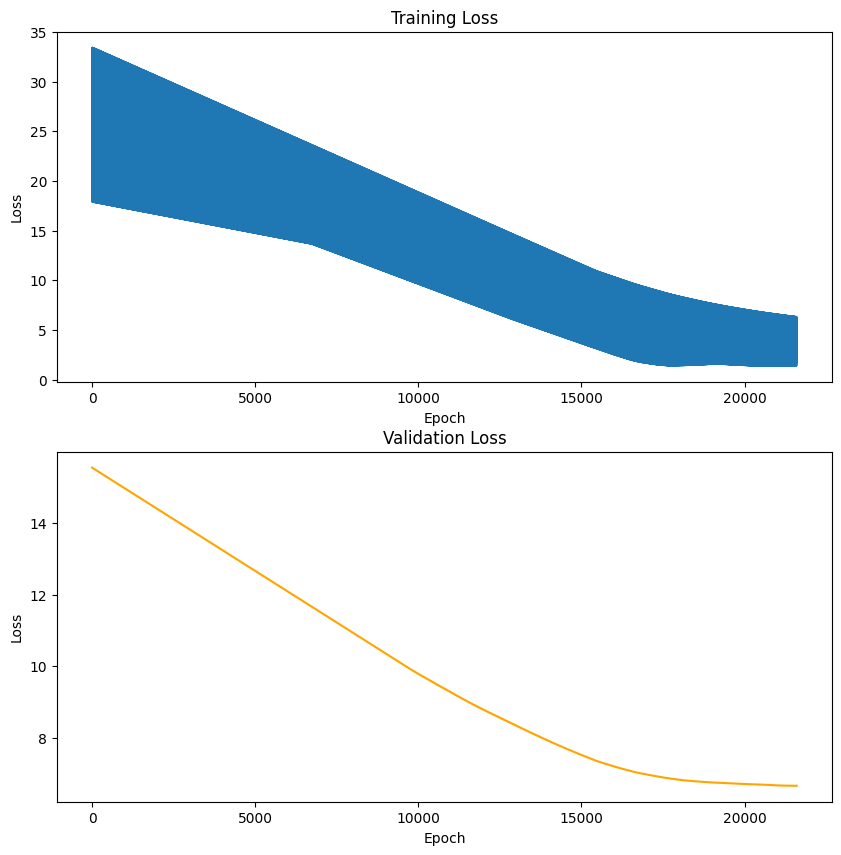

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(history["losses_train"])
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax[1].plot(history['losses_val'], 'orange')
ax[1].set(xlabel='Epoch', ylabel='Loss')
ax[1].set_title('Validation Loss')

plt.show()

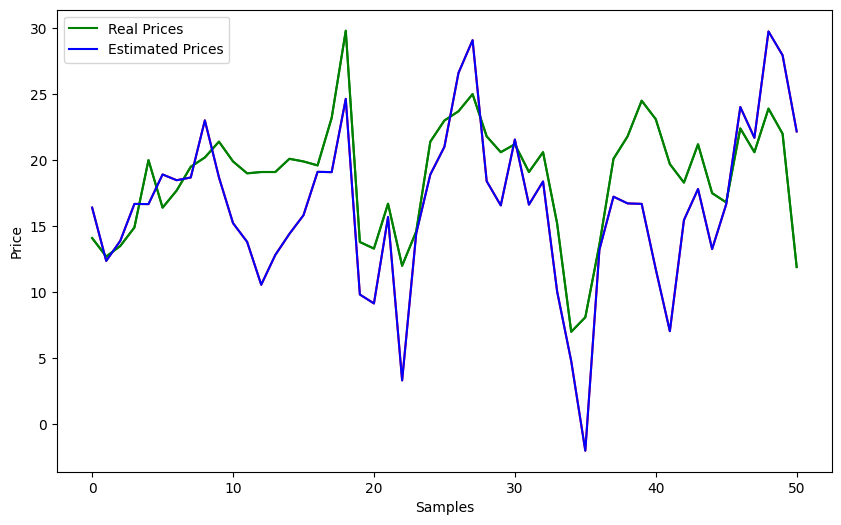

In [100]:
estimated_prices = []

for feature in X_test: 
    estimated_price = sum(c*x for x, c in zip(feature, LinearRegressionModel.theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y_test, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(y_test, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()

### Batch_size = n_sample, learning_rate = 0.00001, MSE

In [113]:
batch_size = len(X_train)
learning_rate = 1e-3
n_iters = 16000
LinearRegressionModel = LinearRegression(n_features, batch_size = batch_size, loss_type = "mae")
history = LinearRegressionModel.fit(X_train, y_train, X_val, y_val, n_iters, learning_rate)

Epoch: 10, loss: 24.77322769165039, loss_val: 14.477952003479004
Epoch: 20, loss: 24.761917114257812, loss_val: 14.471794128417969
Epoch: 30, loss: 24.7506103515625, loss_val: 14.465638160705566
Epoch: 40, loss: 24.739295959472656, loss_val: 14.459480285644531
Epoch: 50, loss: 24.727991104125977, loss_val: 14.453322410583496
Epoch: 60, loss: 24.7166805267334, loss_val: 14.447165489196777
Epoch: 70, loss: 24.705368041992188, loss_val: 14.441006660461426
Epoch: 80, loss: 24.694059371948242, loss_val: 14.434847831726074
Epoch: 90, loss: 24.682748794555664, loss_val: 14.428691864013672
Epoch: 100, loss: 24.671438217163086, loss_val: 14.422534942626953
Epoch: 110, loss: 24.66012954711914, loss_val: 14.416374206542969
Epoch: 120, loss: 24.648820877075195, loss_val: 14.410219192504883
Epoch: 130, loss: 24.637510299682617, loss_val: 14.404062271118164
Epoch: 140, loss: 24.62619972229004, loss_val: 14.397902488708496
Epoch: 150, loss: 24.61488914489746, loss_val: 14.391745567321777
Epoch: 160, 

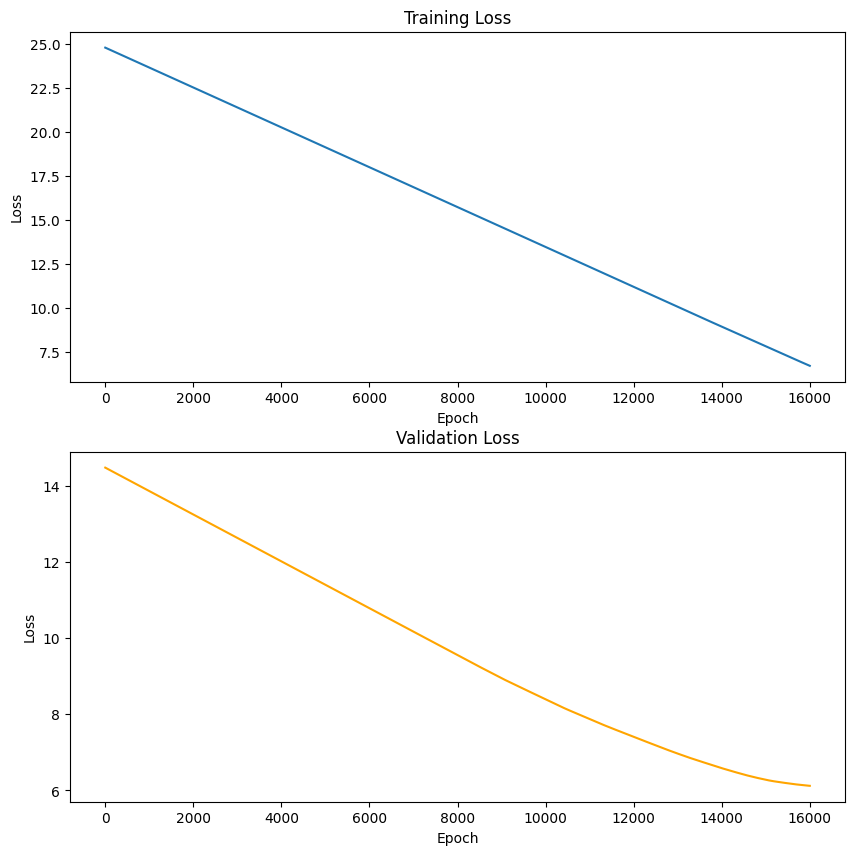

In [114]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(history["losses_train"])
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Training Loss')

ax[1].plot(history['losses_val'], 'orange')
ax[1].set(xlabel='Epoch', ylabel='Loss')
ax[1].set_title('Validation Loss')

plt.show()

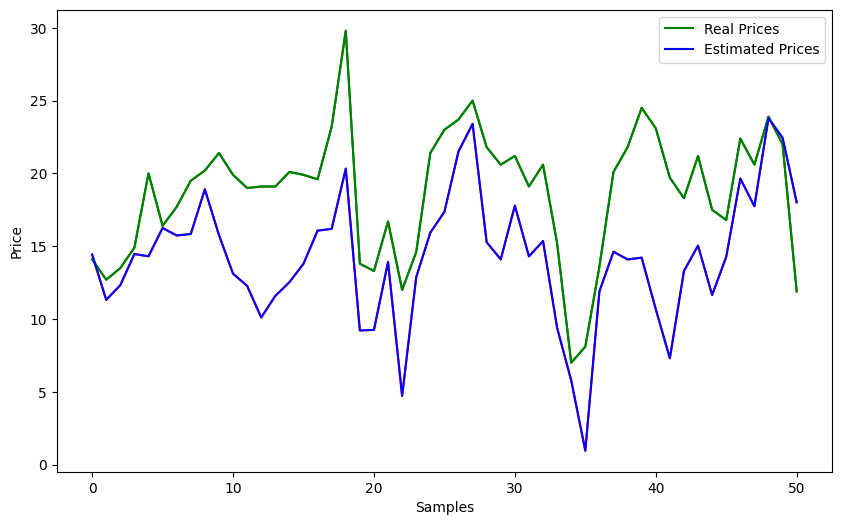

In [115]:
estimated_prices = []

for feature in X_test: 
    estimated_price = sum(c*x for x, c in zip(feature, LinearRegressionModel.theta))
    estimated_prices.append(estimated_price)
         
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(y_test, c='green')    
plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.plot(y_test, c='green', label='Real Prices')
plt.plot(estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()